# What is satisfaction for a programmer?

## Analyzing Stack Overflow's annual Developer [Surveys](https://insights.stackoverflow.com/survey)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 999

#### Setup surveys dictionary for an easy access to all the surveys' data

In [3]:
surveys = {
    "2011": {
        "data": "2011 Stack Overflow Survey Results/2011 Stack Overflow Survey Results.csv",
        "readme": None,
        "schema": None
    },
    "2012": {
        "data": "2012 Stack Overflow Survey Results/2012 Stack Overflow Survey Results.csv",
        "readme": None,
        "schema": None
    },
    "2013": {
        "data": "2013 Stack Overflow Survey Responses/2013 Stack Overflow Survey Responses.csv",
        "readme": None,
        "schema": None
    },
    "2014": {
        "data": "2014 Stack Overflow Survey Responses/2014 Stack Overflow Survey Responses.csv",
        "readme": None,
        "schema": None
    },
    "2015": {
        "data": "2015 Stack Overflow Developer Survey Responses/2015 Stack Overflow Developer Survey Responses.csv",
        "readme": None,
        "schema": None
    },
    "2016": {
        "data": "2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv",
        "readme": "2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Results/READ_ME_-_The_Public_2016_Stack_Overflow_Developer_Survey_Results.txt",
        "schema": None
    },
    "2017": {
        "data": "developer_survey_2017/survey_results_public.csv",
        "readme": "developer_survey_2017/README_2017.txt",
        "schema": "developer_survey_2017/survey_results_schema.csv"
    },
    "2018": {
        "data": "developer_survey_2018/survey_results_public.csv",
        "readme": "developer_survey_2018/README_2018.txt",
        "schema": "developer_survey_2018/survey_results_schema.csv"
    },
    "2019": {
        "data": "developer_survey_2019/survey_results_public.csv",
        "readme": "developer_survey_2019/README_2019.txt",
        "schema": "developer_survey_2019/survey_results_schema.csv"
    },
    "2020": {
        "data": "developer_survey_2020/survey_results_public.csv",
        "readme": "developer_survey_2020/README_2020.txt",
        "schema": "developer_survey_2020/survey_results_schema.csv"
    }
}

#### Setup functions for searching columns for keywords

In [4]:
def search_schema(df, string):
    """Search schema's DataFrame columns 'Question' for the word match.
    Args:
        df (pandas.DataFrame): Dataset containing columns and their descriptions.
        string (str): Query or key word to search for.
    Returns:
        DataFrame containing labels and questions with the matched word.
    """
    if 'Question' in df.columns:
        return df[df['Question'].str.contains('\W*'+string+'\W*', case=False, regex=True)]
    return df[df['QuestionText'].str.contains('\W*'+string+'\W*', case=False, regex=True)]

def search_columns(df, string):
    """Search DataFrame's columns for the word match.
    Args:
        df (pandas.DataFrame): Dataset containing survey info.
        string (str): Query or key word to search for.
    Returns:
        List containing all the columns with the word match.
    """
    return df.columns[df.columns.str.contains('\W*'+string+'\W*', case=False, regex=True)].tolist()

In [5]:
# This is example how `search_schema` works and the description of a column with the subject of study "LanguageWorkedWith"
search_schema(pd.read_csv(surveys['2020']['schema']), 'lang')

,Column,QuestionText
21,LanguageDesireNextYear,"Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)"
22,LanguageWorkedWith,"Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)"
32,NEWLearn,How frequently do you learn a new language or framework?


In [6]:
# Description of a column with the subject of study "JobSat"
search_schema(pd.read_csv(surveys['2020']['schema']), 'sat')

,Column,QuestionText
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
18,JobFactors,"Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?"
19,JobSat,"How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)"


In [7]:
search_schema(pd.read_csv(surveys['2017']['schema']), 'Overpaid')

,Column,Question


In [8]:
survey_2017 = pd.read_csv(surveys['2017']['data'], low_memory=True)
survey_2017.shape

(51392, 154)

In [9]:
survey_2018 = pd.read_csv(surveys['2018']['data'], low_memory=False)
survey_2018.shape
# print(survey_2018.columns.tolist())

(98855, 129)

In [10]:
survey_2019 = pd.read_csv(surveys['2019']['data'], low_memory=False)
survey_2019.shape
# print(survey_2019.columns.tolist())

(88883, 85)

In [11]:
survey_2020 = pd.read_csv(surveys['2020']['data'], low_memory=False)
survey_2020.shape
# print(survey_2020.columns.tolist())

(64461, 61)

In [12]:
# This is example how `search_columns` works and all the columns in the data set containing substring "sat" in their names
search_columns(survey_2017, 'sat')

['CareerSatisfaction',
 'JobSatisfaction',
 'AssessJobCompensation',
 'EquipmentSatisfiedMonitors',
 'EquipmentSatisfiedCPU',
 'EquipmentSatisfiedRAM',
 'EquipmentSatisfiedStorage',
 'EquipmentSatisfiedRW',
 'StackOverflowSatisfaction']

In [13]:
# Inspecting selected columns in the datasets
surveys_list = [survey_2017, survey_2018, survey_2019, survey_2020]
surveys_columns = [
    'Salary',
    'Overpaid',
    'JobSatisfaction',
    'JobSat',
    'CareerSatisfaction',
    'CareerSat',
    'HaveWorkedLanguage',
    'LanguageWorkedWith'
]
for idx, survey in enumerate(surveys_list):
    print(f'Survey {idx+2017} shape: {survey.shape}')
    nulls = 0
    for column in surveys_columns:
        if column in survey.columns:
            nulls = survey[column].isnull().sum()
            print(f'{" "*4}"{column}" NULL values: {nulls}, to total: {nulls * 100 / survey.shape[0]:.2f}%')
            if column == 'Salary':
                zero_i = survey[survey[column] == 0].shape[0]
                zero_s = survey[survey[column] == '0'].shape[0]
                zero = zero_i+int(zero_s)
                print(f'{" "*8}"{column}" "0" values: {zero}, to total: {zero * 100 / survey.shape[0]:.2f}%')
            if column == 'Overpaid':
                nulls = survey[survey["Overpaid"].isnull()]["Salary"].notnull().sum()
                print(f'{" "*8}"{column}" NULL but "Salary" !NULL: {nulls}, to total: {nulls * 100 / survey.shape[0]:.2f}%')
                nulls = survey[survey["Salary"].isnull()]["Overpaid"].notnull().sum()
                print(f'{" "*8}"Salary" NULL but "{column}" !NULL: {nulls}, to total: {nulls * 100 / survey.shape[0]:.2f}%')
    print()

Survey 2017 shape: (51392, 154)
    "Salary" NULL values: 38501, to total: 74.92%
        "Salary" "0" values: 6, to total: 0.01%
    "Overpaid" NULL values: 38005, to total: 73.95%
        "Overpaid" NULL but "Salary" !NULL: 33, to total: 0.06%
        "Salary" NULL but "Overpaid" !NULL: 529, to total: 1.03%
    "JobSatisfaction" NULL values: 11016, to total: 21.44%
    "CareerSatisfaction" NULL values: 8697, to total: 16.92%
    "HaveWorkedLanguage" NULL values: 14767, to total: 28.73%

Survey 2018 shape: (98855, 129)
    "Salary" NULL values: 48277, to total: 48.84%
        "Salary" "0" values: 1121, to total: 1.13%
    "JobSatisfaction" NULL values: 29579, to total: 29.92%
    "CareerSatisfaction" NULL values: 22351, to total: 22.61%
    "LanguageWorkedWith" NULL values: 20521, to total: 20.76%

Survey 2019 shape: (88883, 85)
    "JobSat" NULL values: 17895, to total: 20.13%
    "CareerSat" NULL values: 16036, to total: 18.04%
    "LanguageWorkedWith" NULL values: 1314, to total: 1

### What does it feel like to earn 15k or 200k as a programmer? Let's explore!

While inspecting data sets my attention was caught by "Overpaid" column, *latest data set that "Overpaid" column is 2017*

#### Setup functions for cleaning 2017 dataset

In [14]:
intervals = [i for i in range(10000, 100001, 10000)] + [i for i in range(120000, 200001, 20000)]

def process_salary(df, col_name, intervals):
    dataframe = df.copy()
    # Imputation method is dropping missing values
    dataframe = dataframe.dropna(subset=[col_name], axis=0)
    dataframe[col_name] = dataframe[col_name].astype(float)
    dataframe = dataframe.drop(dataframe[dataframe[col_name] == 0].index)
    # Rounding salary to the closest integer on the 'intervals' scale.
    dataframe[col_name] = dataframe[col_name].apply(lambda x: intervals[np.argmin(abs(np.array(intervals) - x))])
    return dataframe

def process_overpaid(df):
    dataframe = df.copy()
    # If respondent still answered about his salary this needs to be included 
    # Imputation method is filling with default value
    dataframe['Overpaid'] = dataframe['Overpaid'].fillna('Not sure')
    return dataframe

def make_dummies(df, col):
    dataframe = pd.get_dummies(df, columns=[col])
    return dataframe

In [15]:
survey_2017_clean = survey_2017.copy()
survey_2017_clean = process_salary(survey_2017_clean, 'Salary', intervals)
survey_2017_clean = process_overpaid(survey_2017_clean)
overpaid_list = ['Overpaid_'+i for i in survey_2017_clean['Overpaid'].unique()]
survey_2017_clean = make_dummies(survey_2017_clean, 'Overpaid')

In [16]:
overpaid_list

['Overpaid_Neither underpaid nor overpaid',
 'Overpaid_Somewhat underpaid',
 'Overpaid_Somewhat overpaid',
 'Overpaid_Greatly underpaid',
 'Overpaid_Not sure',
 'Overpaid_Greatly overpaid']

In [17]:
overpaid_dict = {
    "Overpaid_Greatly underpaid": "Greatly underpaid",
    "Overpaid_Somewhat underpaid": "Somewhat underpaid",
    "Overpaid_Neither underpaid nor overpaid": "Neither",
    "Overpaid_Somewhat overpaid": "Somewhat overpaid",
    "Overpaid_Greatly overpaid": "Greatly overpaid",
    "Overpaid_Not sure": "Not sure",
}

In [18]:
salary_overpaid_2017 = survey_2017_clean[['Salary']+overpaid_list].groupby(by='Salary').sum()
salary_overpaid_2017

,Overpaid_Neither underpaid nor overpaid,Overpaid_Somewhat underpaid,Overpaid_Somewhat overpaid,Overpaid_Greatly underpaid,Overpaid_Not sure,Overpaid_Greatly overpaid
Salary,,,,,,
10000,601.0,926.0,86.0,456.0,16.0,21.0
20000,295.0,466.0,43.0,156.0,1.0,10.0
30000,356.0,590.0,71.0,193.0,4.0,5.0
40000,481.0,678.0,66.0,163.0,1.0,8.0
50000,534.0,721.0,62.0,164.0,2.0,7.0
60000,474.0,592.0,88.0,121.0,2.0,4.0
70000,334.0,435.0,57.0,68.0,1.0,1.0
80000,285.0,334.0,43.0,44.0,1.0,7.0
90000,265.0,271.0,55.0,31.0,1.0,3.0


In [19]:
salary_overpaid_2017['Total'] = salary_overpaid_2017.sum(axis=1)
total = salary_overpaid_2017['Total'].sum()
salary_overpaid_2017['Total, %'] = salary_overpaid_2017['Total'] * 100 / total
salary_overpaid_2017

,Overpaid_Neither underpaid nor overpaid,Overpaid_Somewhat underpaid,Overpaid_Somewhat overpaid,Overpaid_Greatly underpaid,Overpaid_Not sure,Overpaid_Greatly overpaid,Total,"Total, %"
Salary,,,,,,,,
10000,601.0,926.0,86.0,456.0,16.0,21.0,2106.0,16.344587
20000,295.0,466.0,43.0,156.0,1.0,10.0,971.0,7.535894
30000,356.0,590.0,71.0,193.0,4.0,5.0,1219.0,9.460613
40000,481.0,678.0,66.0,163.0,1.0,8.0,1397.0,10.842064
50000,534.0,721.0,62.0,164.0,2.0,7.0,1490.0,11.563834
60000,474.0,592.0,88.0,121.0,2.0,4.0,1281.0,9.941793
70000,334.0,435.0,57.0,68.0,1.0,1.0,896.0,6.953822
80000,285.0,334.0,43.0,44.0,1.0,7.0,714.0,5.541327
90000,265.0,271.0,55.0,31.0,1.0,3.0,626.0,4.858362


In [20]:
def convert_xticks(arr, rank=1000, label='k'):
    result = []
    for idx, i in enumerate(arr):
        tick = ''
        if idx+1 >= len(arr):
            tick = str(i // rank) + label + '+'
        elif idx == 0:
            left = 0
            right = ((arr[idx + 1] - i) // 2 + i) // rank
            tick = str(left) + '-' + str(right) + label
        else:
            left = (i - (i - arr[idx - 1]) // 2 + 1) // rank
            right = ((arr[idx + 1] - i) // 2 + i) // rank
            tick = str(left) + '-' + str(right) + label
        result.append(tick)
    return result

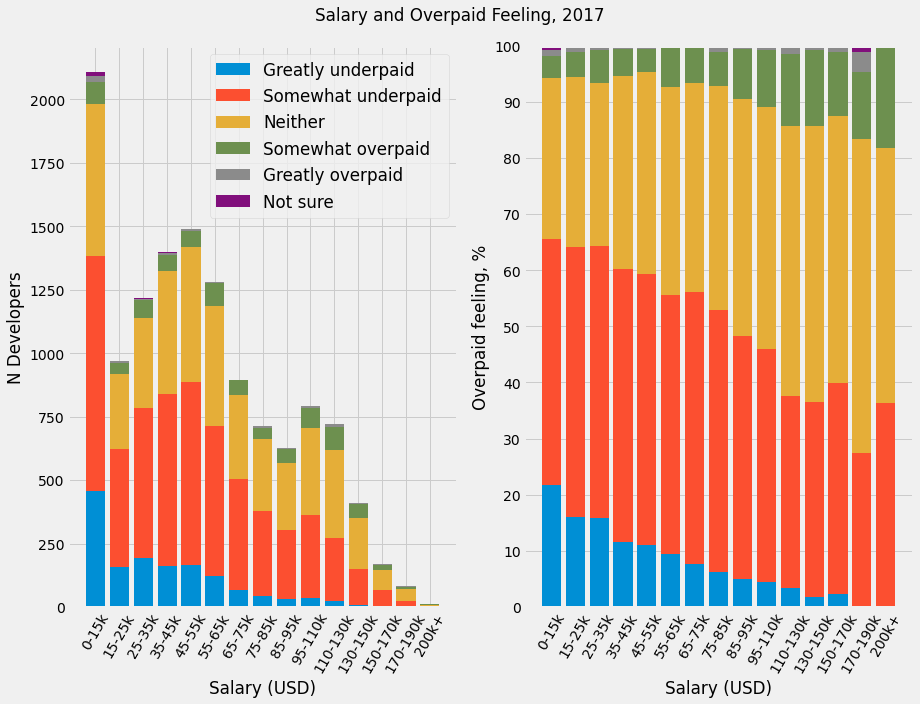

In [21]:
bottom = len(intervals) * [0]
ticks = np.arange(len(intervals))
labels = convert_xticks(intervals)

plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,10))
for overpaid in overpaid_dict:
    axes[0].bar(ticks, salary_overpaid_2017[overpaid], bottom=bottom)
    bottom += salary_overpaid_2017[overpaid]
    
axes[0].set_xlabel('Salary (USD)')
axes[0].set_ylabel('N Developers')
axes[0].set_xticks(ticks)
axes[0].set_xticklabels(labels, rotation=60)
axes[0].legend(labels=overpaid_dict.values(), fontsize='large', loc='upper right')

bottom = len(intervals) * [0]
for overpaid in overpaid_dict:
    row = salary_overpaid_2017[overpaid] * 100 / salary_overpaid_2017['Total']
    axes[1].bar(ticks, row, bottom=bottom)
    bottom += row

axes[1].set_xlabel('Salary (USD)')
axes[1].set_ylabel('Overpaid feeling, %')
axes[1].set_xticks(ticks)
axes[1].set_xticklabels(labels, rotation=60)
axes[1].set_yticks([i for i in range(0, 101, 10)])
axes[1].legend([]).set_visible(False)

fig.suptitle('Salary and Overpaid Feeling, 2017')

fig.tight_layout()
plt.show()

In [22]:
cumsum = salary_overpaid_2017.loc[:, 'Total, %'].cumsum()
cumsum.index = convert_xticks(salary_overpaid_2017.index)
cumsum

0-15k        16.344587
15-25k       23.880481
25-35k       33.341094
35-45k       44.183159
45-55k       55.746993
55-65k       65.688785
65-75k       72.642608
75-85k       78.183935
85-95k       83.042297
95-110k      89.181218
110-130k     94.776872
130-150k     97.958867
150-170k     99.262709
170-190k     99.914629
200k+       100.000000
Name: Total, %, dtype: float64

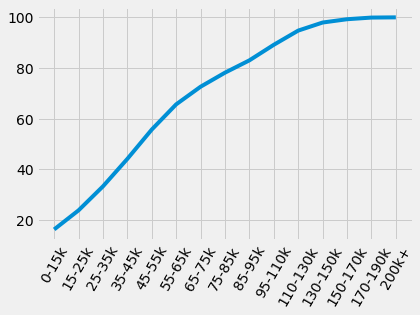

In [23]:
plt.plot(cumsum)
plt.xticks(labels, rotation=60)
plt.show()

In [24]:
salary_total_pct_2017 = salary_overpaid_2017['Total, %'].copy()
salary_total_pct_2017.index = labels
salary_total_pct_2017.index.name = 'Salary'
salary_total_pct_2017

Salary
0-15k       16.344587
15-25k       7.535894
25-35k       9.460613
35-45k      10.842064
45-55k      11.563834
55-65k       9.941793
65-75k       6.953822
75-85k       5.541327
85-95k       4.858362
95-110k      6.138921
110-130k     5.595654
130-150k     3.181995
150-170k     1.303842
170-190k     0.651921
200k+        0.085371
Name: Total, %, dtype: float64

(98855, 129)
(46526, 130)


[]

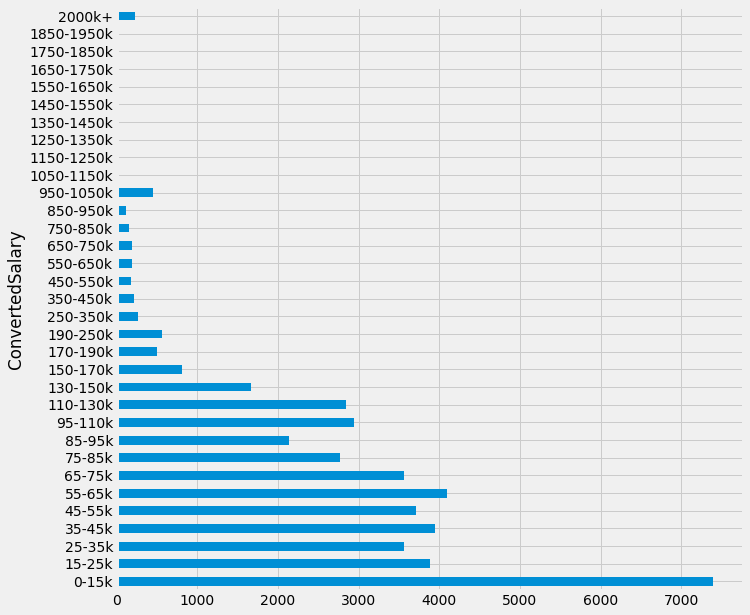

In [25]:
col_name = 'ConvertedSalary'
salary_total_pct_2018 = survey_2018.copy()
print(salary_total_pct_2018.shape)
# Imputation method is dropping missing values
salary_total_pct_2018 = salary_total_pct_2018.dropna(subset=[col_name], axis=0)
salary_total_pct_2018[col_name] = salary_total_pct_2018[col_name].astype(float).round(0)
salary_total_pct_2018['Counts'] = 1
salary_total_pct_2018 = salary_total_pct_2018.drop(salary_total_pct_2018[salary_total_pct_2018[col_name] <= 1000].index)
print(salary_total_pct_2018.shape)

intervals_2018 = intervals+[i for i in range(300000, 2000001, 100000)]
salary_total_pct_2018 = process_salary(salary_total_pct_2018, col_name, intervals_2018)

groupped = salary_total_pct_2018[[col_name, 'Counts']].groupby(col_name).sum()
ax = groupped.plot(kind='barh', figsize=(10,10), legend=False)
# ax.set_xticks(intervals_2018)
ax.set_yticklabels(convert_xticks(intervals_2018), rotation=0)
plt.plot()

# salary_total_pct_2018['Total'] = salary_total_pct_2018.groupby('Salary').sum()
# total = salary_total_pct_2018['Total'].sum()
# salary_total_pct_2018['Total, %'] = salary_total_pct_2018['Total'] * 100 / total
# salary_total_pct_2018

# salary_total_pct_2018[[col_name, 'Counts']].max()

In [26]:
groupped['Counts, %'] = groupped * 100 / groupped.sum()
groupped.cumsum()

,Counts,"Counts, %"
ConvertedSalary,,
10000,7394,15.892189
20000,11276,24.235911
30000,14842,31.900443
40000,18791,40.388170
50000,22500,48.360057
60000,26593,57.157288
70000,30159,64.821820
80000,32923,70.762584
90000,35064,75.364312


# Exploration

In [27]:
def strlist_to_dummies(col, sep=";", prefix="", dummy_na=False, counter=False):
    """Convert strings, containing separated values in pd.series to pd.dummies.
    
    Args:
      col (Pandas.Series): Column with lists, that will be separated and exploded.
      sep (str): Separator of the list values.
      prefix (str): Prefix of the DataFrame column names.
      dummy_na (bool): Add a column to indicate NaNs, if False NaNs are ignored.
      counter (str): Add a column with a number of splitted values.
      
    Returns:
      Pandas.DataFrame dummies.
    """
    # Converting separated values from single string to list
    splitted = col.str.split(sep)
    # Removing unnecessary leading/trailing spaces and handling NAN cases
    stripped = splitted.apply(lambda x: [i.strip() for i in x] if isinstance(x, list) else x)
    exploded = stripped.explode()
    dummies = pd.get_dummies(exploded, dummy_na=dummy_na)
    # Grouping
    df = dummies.sum(level=0)
    if prefix:
        df.columns = map(lambda x: prefix+str(x), df.columns)
    if counter:
        df[counter] = splitted.apply(lambda x: len(x) if isinstance(x, list) else 0)
    return df

In [28]:
survey_2017_explore = survey_2017.copy()

In [29]:
survey_2017_explore.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [30]:
survey_2017_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [31]:
# Inspecting columns
columns_inspect = survey_2017_explore.columns.drop(['Respondent']).tolist()

In [32]:
def inspect_df(df, columns):
    for column in columns:
        unique = df[column].unique()
        value_counts = df[column].value_counts(dropna=False)
        for info in [unique, value_counts]:
            print(f'{info}\n') 
        print('='*50, end='\n'*2)

In [33]:
inspect_df(survey_2017_explore, columns_inspect)

['Student' 'Professional developer'
 'Professional non-developer who sometimes writes code'
 'Used to be a professional developer' 'None of these']

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64


['Yes, both' 'Yes, I program as a hobby' 'No'
 'Yes, I contribute to open source projects']

Yes, I program as a hobby                    24801
Yes, both                                    13756
No                                            9787
Yes, I contribute to open source projects     3048
Name: ProgramHobby, dtype: int64


['United States' 'United Kingdom' 'Switzerland' 'New Zealand' 'Poland'
 'Colombia' 'France' 'Canada' 'Germany' 'Greece' 'Brazil' 'Israel' 'Italy'
 'Belgium' 'India' 'Chile' '

[nan '20 or more years' '9 to 10 years' '10 to 11 years' '8 to 9 years'
 '7 to 8 years' '11 to 12 years' '15 to 16 years' '1 to 2 years'
 '3 to 4 years' '12 to 13 years' 'Less than a year' '5 to 6 years'
 '16 to 17 years' '13 to 14 years' '6 to 7 years' '2 to 3 years'
 '17 to 18 years' '4 to 5 years' '14 to 15 years' '18 to 19 years'
 '19 to 20 years']

NaN                 10502
1 to 2 years         5289
2 to 3 years         4767
3 to 4 years         4003
4 to 5 years         3405
20 or more years     3067
Less than a year     3034
5 to 6 years         2990
9 to 10 years        1956
6 to 7 years         1912
10 to 11 years       1678
7 to 8 years         1638
8 to 9 years         1287
15 to 16 years        845
14 to 15 years        840
11 to 12 years        838
12 to 13 years        741
16 to 17 years        694
17 to 18 years        545
13 to 14 years        531
19 to 20 years        427
18 to 19 years        403
Name: YearsCodedJob, dtype: int64


[nan '17 to 18 years' '5 to 6 years'

['Disagree' nan 'Somewhat agree' 'Strongly disagree' 'Strongly agree'
 'Agree']

NaN                  20208
Disagree             11870
Somewhat agree        9864
Agree                 5134
Strongly disagree     2742
Strongly agree        1574
Name: BoringDetails, dtype: int64


['Strongly agree' nan 'Agree' 'Somewhat agree' 'Strongly disagree'
 'Disagree']

NaN                  20152
Agree                13035
Somewhat agree        7862
Strongly agree        7347
Disagree              2408
Strongly disagree      588
Name: JobSecurity, dtype: int64


['Agree' nan 'Strongly agree' 'Somewhat agree' 'Strongly disagree'
 'Disagree']

NaN                  20489
Agree                12011
Strongly agree        8022
Somewhat agree        7363
Disagree              2327
Strongly disagree     1180
Name: DiversityImportant, dtype: int64


['Agree' nan 'Strongly agree' 'Somewhat agree' 'Disagree'
 'Strongly disagree']

NaN                  20371
Strongly agree       12471
Agree                1159

['Somewhat important' nan 'Important' 'Not very important'
 'Not at all important' 'Very important']

NaN                     29414
Somewhat important       6801
Important                5713
Not very important       4779
Not at all important     2531
Very important           2154
Name: AssessJobDiversity, dtype: int64


['Not very important' nan 'Very important' 'Somewhat important'
 'Important' 'Not at all important']

NaN                     29395
Important                7791
Somewhat important       7045
Very important           3393
Not very important       3049
Not at all important      719
Name: AssessJobProduct, dtype: int64


['Somewhat important' nan 'Very important' 'Not very important'
 'Important' 'Not at all important']

NaN                     29369
Important                8870
Somewhat important       7145
Very important           3150
Not very important       2373
Not at all important      485
Name: AssessJobFinances, dtype: int64


['Stock options; Vacation/days off

['Somewhat important' 'Important' nan 'Very important'
 'Not at all important' 'Not very important']

NaN                     22796
Somewhat important      10408
Not very important       8696
Important                5419
Not at all important     2560
Very important           1513
Name: ImportantHiringOpenSource, dtype: int64


['Important' 'Somewhat important' nan 'Not very important'
 'Not at all important' 'Very important']

NaN                     22775
Somewhat important       9899
Not very important       8080
Important                6487
Not at all important     2412
Very important           1739
Name: ImportantHiringPMExp, dtype: int64


['Not very important' 'Somewhat important' nan 'Not at all important'
 'Important' 'Very important']

NaN                     22839
Somewhat important      11723
Not very important       8323
Important                5591
Not at all important     1991
Very important            925
Name: ImportantHiringCompanies, dtype: int64


['Not very impor

['6:00 AM' '10:00 AM' '9:00 AM' nan '7:00 AM' 'Noon' '3:00 PM' '8:00 AM'
 '11:00 AM' '2:00 PM' '2:00 AM' '3:00 AM' '1:00 PM' '8:00 PM' '4:00 PM'
 '7:00 PM' '10:00 PM' '1:00 AM' '5:00 AM' '6:00 PM' '9:00 PM' '5:00 PM'
 '4:00 AM' 'Midnight' '11:00 PM']

NaN         14696
9:00 AM      9401
10:00 AM     9091
8:00 AM      7076
7:00 AM      3364
11:00 AM     2212
6:00 AM      1216
Noon         1146
2:00 PM       443
1:00 PM       399
5:00 AM       294
8:00 PM       280
6:00 PM       254
4:00 PM       249
10:00 PM      212
3:00 PM       206
9:00 PM       156
5:00 PM       134
7:00 PM       127
4:00 AM       123
Midnight       90
11:00 PM       85
1:00 AM        53
3:00 AM        50
2:00 AM        35
Name: WorkStart, dtype: int64


['Swift' 'JavaScript; Python; Ruby; SQL' 'Java; PHP; Python' ...
 'C++; C#; JavaScript; Lua; PHP' 'C++; C#; Perl; Ruby; SQL; VB.NET; VBA'
 'C#; JavaScript; PHP; Python; R; SQL']

NaN                                                                 14767
C#; JavaScrip

['iOS' 'Amazon Web Services (AWS)' nan ...
 'Android; Linux Desktop; Arduino; Serverless; Amazon Web Services (AWS)'
 'Linux Desktop; Salesforce; WordPress; Amazon Web Services (AWS); Microsoft Azure'
 'Android; Windows Phone; Windows Desktop; Arduino; WordPress; Amazon Web Services (AWS)']

NaN                                                                                                                                              22278
Windows Desktop                                                                                                                                   3252
Amazon Web Services (AWS)                                                                                                                         1769
Linux Desktop                                                                                                                                     1534
Android                                                                                                

['Somewhat satisfied' 'Not very satisfied' 'Very satisfied' nan
 'Satisfied' 'Not at all satisfied']

NaN                     21667
Satisfied               11416
Very satisfied           7683
Somewhat satisfied       6281
Not very satisfied       3322
Not at all satisfied     1023
Name: EquipmentSatisfiedMonitors, dtype: int64


['Not very satisfied' 'Satisfied' 'Somewhat satisfied' nan
 'Very satisfied' 'Not at all satisfied']

NaN                     21665
Satisfied               12063
Very satisfied           7343
Somewhat satisfied       6243
Not very satisfied       3075
Not at all satisfied     1003
Name: EquipmentSatisfiedCPU, dtype: int64


['Not at all satisfied' 'Satisfied' nan 'Very satisfied'
 'Not very satisfied' 'Somewhat satisfied']

NaN                     21656
Satisfied               11648
Very satisfied           8166
Somewhat satisfied       5731
Not very satisfied       3113
Not at all satisfied     1078
Name: EquipmentSatisfiedRAM, dtype: int64


['Very satisfied'

['Strongly agree' nan 'Strongly disagree' 'Agree' 'Somewhat agree'
 'Disagree']

NaN                  18982
Somewhat agree       10829
Disagree              9069
Agree                 7212
Strongly disagree     2668
Strongly agree        2632
Name: StackOverflowCommunity, dtype: int64


['Agree' 'Strongly agree' nan 'Somewhat agree' 'Disagree'
 'Strongly disagree']

NaN                  17446
Agree                16502
Strongly agree       13902
Somewhat agree        3272
Disagree               192
Strongly disagree       78
Name: StackOverflowHelpful, dtype: int64


['Strongly agree' 'Agree' nan 'Somewhat agree' 'Disagree'
 'Strongly disagree']

NaN                  17742
Strongly agree       15262
Agree                13832
Somewhat agree        4043
Disagree               387
Strongly disagree      126
Name: StackOverflowBetter, dtype: int64


['Strongly agree' 'Agree' nan 'Disagree' 'Somewhat agree'
 'Strongly disagree']

NaN                  18023
Agree                 8972
Somewh

['Strongly agree' 'Somewhat agree' 'Agree' nan 'Disagree'
 'Strongly disagree']

NaN                  16856
Agree                16061
Somewhat agree       13448
Strongly agree        2897
Disagree              1876
Strongly disagree      254
Name: QuestionsInteresting, dtype: int64


['Disagree' 'Somewhat agree' nan 'Strongly disagree' 'Agree'
 'Strongly agree']

Disagree             20955
NaN                  16973
Strongly disagree     9497
Somewhat agree        3220
Agree                  583
Strongly agree         164
Name: QuestionsConfusing, dtype: int64


['Strongly agree' 'Agree' nan 'Somewhat agree' 'Disagree'
 'Strongly disagree']

NaN                  16780
Agree                14603
Strongly agree       14324
Somewhat agree        4331
Disagree               992
Strongly disagree      362
Name: InterestedAnswers, dtype: int64


[            nan 113750.         100000.         ...  21414.91395794
 105400.           6460.13801204]

NaN              38501
120000.000000      1

### Conclusion on the exploration:

1. Columns with lots of missing data.
    - Will drop if threshold of 60% is exceeded.
2. Columns with multiple answers separated by ";".
    - These cases will have different approach.
    - Add extra column with count.
    - Split into different columns (dummies).
3. Doubtful questions such as: "Tabs or spaces?", "How do you pronounce 'GIF'?".
    - Can be dropped.
4. Uncertain questions such as: "The ads on Stack Overflow are relevant to me".
    - Can be dropped.
5. Categorical columns will become dummies.

In [34]:
survey_2017_explore['ExCoderReturn'].isnull().sum() / survey_2017_explore.shape[0]

0.9820400062266501

In [35]:
# These columns have more than 60% missing data
columns_to_drop = ['Respondent']

# Before making dummies need to split these strings with multiple values
columns_to_split = []

columns_doubtful = [
    'PronounceGIF',
    'ClickyKeys',
    'TabsSpaces',
    'SurveyLong',
    'QuestionsInteresting',
    'QuestionsConfusing',
    'InterestedAnswers'
]

columns_uncertain = [
    'StackOverflowAdsRelevant',
    'StackOverflowAdsDistracting',
    'StackOverflowMakeMoney',
    'SurveyLong',
    'QuestionsInteresting',
    'QuestionsConfusing',
    'InterestedAnswers'
]

for column in survey_2017_explore.columns:
    # Searching for columns with missing values
    if survey_2017_explore[column].isnull().sum() / survey_2017_explore.shape[0] >= 0.6:
        columns_to_drop.append(column)
    # Searching for ";" occurence if it's object (str) type
    if survey_2017_explore[column].dtype == np.dtype('O'):
        if survey_2017_explore[column].apply(lambda x: False if isinstance(x, (int, float)) else True if x.find(';') >= 1 else False).any():
            columns_to_split.append(column)
            
print(f'Columns to drop:\n{columns_to_drop}\nColumns to split:\n{columns_to_split}')

Columns to drop:
['Respondent', 'YearsCodedJobPast', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'Overpaid', 'TimeAfterBootcamp', 'HaveWorkedFramework', 'Salary', 'ExpectedSalary']
Columns to split:
['DeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'ImportantBenefits', 'JobProfile', 'EducationTypes', 'SelfTaughtTypes', 'CousinEducation', 'HaveWorkedLanguage', 'WantWorkLanguage', 'HaveWorkedFramework', 'WantWorkFramework', 'HaveWorkedDatabase', 'WantWorkDatabase', 'HaveWorkedPlatform', 'WantWorkPlatform', 'IDE', 'Methodology', 'MetricAssess', 'StackOverflowDevices', 'Gender', 'Race']


In [36]:
# Not dropping columns that are needed for the research
keep_columns = ['Salary', 'Overpaid', 'JobSatisfaction', 'CareerSatisfaction']
# for column in keep_columns:
#     survey_2017_explore[column+'_Missing'] = survey_2017_explore[column].isnull()

# Update columns to drop
for keep_column in keep_columns:
    if keep_column in columns_to_drop:
        columns_to_drop.remove(keep_column)
        
# Update columns to split
for column in set(columns_to_drop).intersection(columns_to_split):
        columns_to_split.remove(column)

In [37]:
print(f'Columns to drop:\n{columns_to_drop}\
      \nColumns to split:\n{columns_to_split}\
      \nColumns doubtful:\n{columns_doubtful}\
      \nColumns uncertain:\n{columns_uncertain}')

Columns to drop:
['Respondent', 'YearsCodedJobPast', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'TimeAfterBootcamp', 'HaveWorkedFramework', 'ExpectedSalary']      
Columns to split:
['DeveloperType', 'ImportantBenefits', 'JobProfile', 'EducationTypes', 'SelfTaughtTypes', 'CousinEducation', 'HaveWorkedLanguage', 'WantWorkLanguage', 'WantWorkFramework', 'HaveWorkedDatabase', 'WantWorkDatabase', 'HaveWorkedPlatform', 'WantWorkPlatform', 'IDE', 'Methodology', 'MetricAssess', 'StackOverflowDevices', 'Gender', 'Race']      
Columns doubtful:
['PronounceGIF', 'ClickyKeys', 'TabsSpaces', 'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing', 'InterestedAnswers']      
Columns uncertain:
['StackOverflowAdsRelevant', 'StackOverflowAdsDistracting', 'StackOverflowMakeMoney', 'SurveyLong', 'QuestionsInteresting', 'QuestionsConfus

In [38]:
columns_left = set(survey_2017_explore.columns).difference(columns_to_drop + columns_to_split + columns_doubtful + columns_uncertain + keep_columns)
columns_left = list(columns_left)
columns_left

['ChangeWorld',
 'EquipmentSatisfiedMonitors',
 'StackOverflowCommunity',
 'StackOverflowAnswer',
 'EquipmentSatisfiedCPU',
 'AssessJobProfDevel',
 'CheckInCode',
 'ImportantHiringRep',
 'ImportantHiringTitles',
 'ProjectManagement',
 'ImportantHiringAlgorithms',
 'StackOverflowModeration',
 'LearnedHiring',
 'ImportantHiringCommunication',
 'AssessJobCommute',
 'InTheZone',
 'ResumePrompted',
 'VersionControl',
 'ShipIt',
 'KinshipDevelopers',
 'AssessJobRemote',
 'CompetePeers',
 'WorkPayCare',
 'EmploymentStatus',
 'AssessJobFinances',
 'ImportantHiringCompanies',
 'HomeRemote',
 'AssessJobDiversity',
 'StackOverflowJobSearch',
 'AssessJobRole',
 'EquipmentSatisfiedRW',
 'EnjoyDebugging',
 'DiversityImportant',
 'AssessJobLeaders',
 'StackOverflowDescribes',
 'RightWrongWay',
 'YearsProgram',
 'AssessJobCompensation',
 'InfluenceServers',
 'InfluenceVizTools',
 'ImportantHiringOpenSource',
 'CollaborateRemote',
 'InfluenceWorkstation',
 'StackOverflowCompanyPage',
 'HighestEducation

In [39]:
inspect_df(survey_2017_explore, columns_left)

['Agree' nan 'Somewhat agree' 'Strongly agree' 'Disagree'
 'Strongly disagree']

NaN                  20457
Agree                 9192
Somewhat agree        9060
Strongly agree        7236
Disagree              4446
Strongly disagree     1001
Name: ChangeWorld, dtype: int64


['Somewhat satisfied' 'Not very satisfied' 'Very satisfied' nan
 'Satisfied' 'Not at all satisfied']

NaN                     21667
Satisfied               11416
Very satisfied           7683
Somewhat satisfied       6281
Not very satisfied       3322
Not at all satisfied     1023
Name: EquipmentSatisfiedMonitors, dtype: int64


['Strongly agree' nan 'Strongly disagree' 'Agree' 'Somewhat agree'
 'Disagree']

NaN                  18982
Somewhat agree       10829
Disagree              9069
Agree                 7212
Strongly disagree     2668
Strongly agree        2632
Name: StackOverflowCommunity, dtype: int64


['Several times' 'At least once each day' nan "Haven't done at all"
 'Once or twice' 'At least once each

["Haven't done at all" 'Once or twice' 'At least once each week' nan
 'Several times' 'At least once each day']

Haven't done at all        24202
NaN                        17977
Once or twice               5492
Several times               2719
At least once each week      803
At least once each day       199
Name: StackOverflowJobSearch, dtype: int64


['Very important' nan 'Somewhat important' 'Important'
 'Not very important' 'Not at all important']

NaN                     29245
Important                8373
Somewhat important       5624
Very important           4353
Not very important       2937
Not at all important      860
Name: AssessJobRole, dtype: int64


['Satisfied' 'Somewhat satisfied' nan 'Very satisfied'
 'Not very satisfied' 'Not at all satisfied']

NaN                     21703
Satisfied               12040
Very satisfied           8197
Somewhat satisfied       5464
Not very satisfied       2832
Not at all satisfied     1156
Name: EquipmentSatisfiedRW, dtype: int64


[

['Strongly agree' nan 'Agree' 'Somewhat agree' 'Disagree'
 'Strongly disagree']

NaN                  20158
Strongly agree       17433
Agree                11419
Somewhat agree        2054
Disagree               248
Strongly disagree       80
Name: BuildingThings, dtype: int64


['Strongly agree' nan 'Agree' 'Somewhat agree' 'Disagree'
 'Strongly disagree']

NaN                  20099
Strongly agree       18040
Agree                11084
Somewhat agree        1890
Disagree               179
Strongly disagree      100
Name: ProblemSolving, dtype: int64


[nan 'Disagree' 'Agree' 'Somewhat agree' 'Strongly agree'
 'Strongly disagree']

NaN                  21773
Somewhat agree       11599
Agree                 6905
Disagree              6699
Strongly agree        3455
Strongly disagree      961
Name: OtherPeoplesCode, dtype: int64


['Very important' nan 'Somewhat important' 'Important'
 'Not at all important' 'Not very important']

NaN                     29388
Important                9



[ 9.  8. 10. nan  6.  7.  5.  4.  2.  3.  1.  0.]

NaN     14800
8.0     10227
9.0      9792
10.0     9166
7.0      4724
6.0      1456
5.0       716
4.0       202
3.0       162
2.0        73
1.0        38
0.0        36
Name: StackOverflowSatisfaction, dtype: int64


['Very important' nan 'Important' 'Somewhat important'
 'Not very important' 'Not at all important']

NaN                     29203
Important                9106
Very important           7463
Somewhat important       4237
Not very important       1151
Not at all important      232
Name: AssessJobTech, dtype: int64


[nan 'No influence at all' 'Some influence' 'Not much influence'
 'A lot of influence' 'I am the final decision maker']

NaN                              29814
No influence at all               6891
Some influence                    6162
Not much influence                4594
A lot of influence                3295
I am the final decision maker      636
Name: InfluenceCommunication, dtype: int64


['United Stat

[nan 'Privately-held limited company, not in startup mode'
 'Publicly-traded corporation'
 'Non-profit/non-governmental organization or private school/university'
 'Government agency or public school/university' 'Pre-series A startup'
 'Venture-funded startup' "I don't know"
 'Sole proprietorship or partnership, not in startup mode'
 'I prefer not to answer' 'State-owned company' 'Something else']

Privately-held limited company, not in startup mode                      16709
NaN                                                                      12569
Publicly-traded corporation                                               5871
I don't know                                                              3233
Sole proprietorship or partnership, not in startup mode                   2831
Government agency or public school/university                             2451
Venture-funded startup                                                    2387
I prefer not to answer                       

['Disagree' nan 'Somewhat agree' 'Agree' 'Strongly disagree'
 'Strongly agree']

NaN                  20335
Disagree              9609
Somewhat agree        7922
Agree                 7400
Strongly disagree     3277
Strongly agree        2849
Name: FriendsDevelopers, dtype: int64


['Agree' nan 'Strongly agree' 'Somewhat agree' 'Disagree'
 'Strongly disagree']

NaN                  20088
Strongly agree       15318
Agree                12452
Somewhat agree        3042
Disagree               370
Strongly disagree      122
Name: LearningNewTech, dtype: int64


["Haven't done at all" 'Several times' nan 'Once or twice'
 'At least once each week' 'At least once each day']

NaN                        17483
Once or twice              10400
Several times              10239
Haven't done at all         8433
At least once each week     3811
At least once each day      1026
Name: StackOverflowCopiedCode, dtype: int64


['Very satisfied' 'Satisfied' nan 'Somewhat satisfied'
 'Not very satisfied' 'N

These look categorical and ready to become dummies.

In [40]:
columns_to_dummies = columns_left

In [41]:
dummies = []
for dummy in columns_to_split:
    dummies.append(strlist_to_dummies(survey_2017_explore[dummy], ';', dummy+'_', True, dummy+'_Counter'))

survey_2017_clean = pd.concat(dummies, axis=1)
survey_2017_clean.shape

(51392, 312)

In [42]:
type(survey_2017_explore[dummy])

pandas.core.series.Series

In [43]:
survey_2017_clean

,DeveloperType_Data scientist,DeveloperType_Database administrator,DeveloperType_Desktop applications developer,DeveloperType_DevOps specialist,DeveloperType_Developer with a statistics or mathematics background,DeveloperType_Embedded applications/devices developer,DeveloperType_Graphic designer,DeveloperType_Graphics programming,DeveloperType_Machine learning specialist,DeveloperType_Mobile developer,...,Race_East Asian,Race_Hispanic or Latino/Latina,Race_I don’t know,Race_I prefer not to say,Race_Middle Eastern,"Race_Native American, Pacific Islander, or Indigenous Australian",Race_South Asian,Race_White or of European descent,Race_nan,Race_Counter
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,2
51388,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
51389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
51390,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [44]:
dummies = pd.get_dummies(survey_2017_explore[columns_to_dummies], dummy_na=True)
dummies

,HoursPerWeek,StackOverflowSatisfaction,ChangeWorld_Agree,ChangeWorld_Disagree,ChangeWorld_Somewhat agree,ChangeWorld_Strongly agree,ChangeWorld_Strongly disagree,ChangeWorld_nan,EquipmentSatisfiedMonitors_Not at all satisfied,EquipmentSatisfiedMonitors_Not very satisfied,...,InfluenceHardware_No influence at all,InfluenceHardware_Not much influence,InfluenceHardware_Some influence,InfluenceHardware_nan,InfluenceDeptTech_A lot of influence,InfluenceDeptTech_I am the final decision maker,InfluenceDeptTech_No influence at all,InfluenceDeptTech_Not much influence,InfluenceDeptTech_Some influence,InfluenceDeptTech_nan
0,0.0,9.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,NaN,8.0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0
2,NaN,8.0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,5.0,10.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,NaN,NaN,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,5.0,9.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
51388,NaN,7.0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
51389,NaN,NaN,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
51390,1.0,9.0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [45]:
# These dummies failed somehow
failed_dummies = set(dummies.columns).intersection(survey_2017_explore.columns)
failed_dummies

{'HoursPerWeek', 'StackOverflowSatisfaction'}

In [46]:
survey_2017_explore['HoursPerWeek'].value_counts()

1.0     5901
0.0     5129
2.0     2933
3.0     1233
4.0     1096
5.0      958
10.0     559
40.0     476
6.0      427
8.0      325
7.0      266
20.0     259
15.0     134
12.0     126
9.0       93
14.0      77
11.0      58
30.0      55
35.0      46
19.0      45
16.0      41
13.0      37
25.0      34
21.0      34
24.0      33
18.0      30
17.0      25
22.0      22
39.0      18
38.0      16
37.0      16
36.0      15
26.0      14
27.0      12
32.0      11
23.0      11
28.0      10
34.0       9
29.0       7
31.0       5
33.0       4
Name: HoursPerWeek, dtype: int64

In [47]:
survey_2017_explore['StackOverflowSatisfaction'].value_counts()

8.0     10227
9.0      9792
10.0     9166
7.0      4724
6.0      1456
5.0       716
4.0       202
3.0       162
2.0        73
1.0        38
0.0        36
Name: StackOverflowSatisfaction, dtype: int64

Not object type, that's why.

In [48]:
survey_2017_clean = pd.concat([survey_2017_clean, dummies], axis=1)

In [49]:
survey_2017_clean['Salary'] = survey_2017_explore['Salary']
survey_2017_clean['Salary_Miss'] = survey_2017_clean['Salary'].isnull()
survey_2017_clean['Salary_Miss'] = survey_2017_clean['Salary_Miss'].astype(int)
survey_2017_clean['Salary_Miss']

0        1
1        1
2        0
3        1
4        1
        ..
51387    0
51388    1
51389    1
51390    0
51391    1
Name: Salary_Miss, Length: 51392, dtype: int32

In [50]:
dummies = pd.get_dummies(survey_2017_explore[keep_columns[1:]], dummy_na=True)
dummies

,JobSatisfaction,CareerSatisfaction,Overpaid_Greatly overpaid,Overpaid_Greatly underpaid,Overpaid_Neither underpaid nor overpaid,Overpaid_Somewhat overpaid,Overpaid_Somewhat underpaid,Overpaid_nan
0,NaN,NaN,0,0,0,0,0,1
1,NaN,NaN,0,0,0,0,0,1
2,9.0,8.0,0,0,1,0,0,0
3,3.0,6.0,0,0,0,0,0,1
4,8.0,6.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
51387,3.0,7.0,0,1,0,0,0,0
51388,NaN,NaN,0,0,0,0,0,1
51389,10.0,10.0,0,0,0,0,0,1
51390,7.0,6.0,0,1,0,0,0,0


In [51]:
survey_2017_clean = pd.concat([survey_2017_clean, dummies], axis=1)
survey_2017_clean

,DeveloperType_Data scientist,DeveloperType_Database administrator,DeveloperType_Desktop applications developer,DeveloperType_DevOps specialist,DeveloperType_Developer with a statistics or mathematics background,DeveloperType_Embedded applications/devices developer,DeveloperType_Graphic designer,DeveloperType_Graphics programming,DeveloperType_Machine learning specialist,DeveloperType_Mobile developer,...,Salary,Salary_Miss,JobSatisfaction,CareerSatisfaction,Overpaid_Greatly overpaid,Overpaid_Greatly underpaid,Overpaid_Neither underpaid nor overpaid,Overpaid_Somewhat overpaid,Overpaid_Somewhat underpaid,Overpaid_nan
0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,113750.0,0,9.0,8.0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,NaN,1,3.0,6.0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,1,0,1,...,NaN,1,8.0,6.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,0,1,1,0,1,0,0,0,0,0,...,58000.0,0,3.0,7.0,0,1,0,0,0,0
51388,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,0,0,0,0,0,1
51389,0,0,0,0,0,0,0,0,0,0,...,NaN,1,10.0,10.0,0,0,0,0,0,1
51390,0,0,0,0,0,0,0,0,0,1,...,40000.0,0,7.0,6.0,0,1,0,0,0,0


In [52]:
corrmat_pearson_ = survey_2017_clean.corr()
corrmat_pearson = corrmat_pearson_.copy()

In [53]:
# corrmat_spearman_ = survey_2017_clean.corr(method='spearman')
# corrmat_spearman = corrmat_spearman_.copy()

In [54]:
corrmat_pearson = corrmat_pearson.replace({1.0: np.nan})
corrmat_pearson = corrmat_pearson[corrmat_pearson > 0.5].dropna(how='all')
corrmat_pearson = corrmat_pearson[corrmat_pearson > 0.5].dropna(how='all', axis=1)
corrmat_pearson

,DeveloperType_Database administrator,DeveloperType_Desktop applications developer,DeveloperType_Systems administrator,DeveloperType_Web developer,DeveloperType_nan,DeveloperType_Counter,ImportantBenefits_Equipment,ImportantBenefits_Expected work hours,ImportantBenefits_Health benefits,ImportantBenefits_Remote options,...,InfluenceHardware_nan,InfluenceDeptTech_A lot of influence,InfluenceDeptTech_I am the final decision maker,InfluenceDeptTech_No influence at all,InfluenceDeptTech_nan,Salary,Salary_Miss,JobSatisfaction,CareerSatisfaction,Overpaid_nan
DeveloperType_Database administrator,NaN,NaN,NaN,NaN,NaN,0.562055,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeveloperType_Desktop applications developer,NaN,NaN,NaN,NaN,NaN,0.521438,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeveloperType_Systems administrator,NaN,NaN,NaN,NaN,NaN,0.535725,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeveloperType_Web developer,NaN,NaN,NaN,NaN,NaN,0.522700,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeveloperType_nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeveloperType_Counter,0.562055,0.521438,0.535725,0.522700,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ImportantBenefits_Equipment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ImportantBenefits_Expected work hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ImportantBenefits_Health benefits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ImportantBenefits_Remote options,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
corrmat_pearson['Salary'].dropna()

Currency_U.S. dollars ($)    0.568964
Country_United States        0.644508
Name: Salary, dtype: float64

In [55]:
corrmat_spearman = corrmat_spearman.replace({1.0: np.nan})
corrmat_spearman = corrmat_spearman[corrmat_spearman > 0.5].dropna(how='all')
corrmat_spearman = corrmat_spearman[corrmat_spearman > 0.5].dropna(how='all', axis=1)
corrmat_spearman

,DeveloperType_Desktop applications developer,DeveloperType_Web developer,DeveloperType_nan,DeveloperType_Counter,ImportantBenefits_Expected work hours,ImportantBenefits_Health benefits,ImportantBenefits_Remote options,ImportantBenefits_Vacation/days off,ImportantBenefits_nan,ImportantBenefits_Counter,...,InfluenceHardware_nan,InfluenceDeptTech_A lot of influence,InfluenceDeptTech_I am the final decision maker,InfluenceDeptTech_No influence at all,InfluenceDeptTech_nan,Salary,Salary_Miss,JobSatisfaction,CareerSatisfaction,Overpaid_nan
DeveloperType_Desktop applications developer,NaN,NaN,NaN,0.516513,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeveloperType_Web developer,NaN,NaN,NaN,0.631930,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeveloperType_nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeveloperType_Counter,0.516513,0.631930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ImportantBenefits_Expected work hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.514244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ImportantBenefits_Health benefits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.577133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ImportantBenefits_Remote options,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.581051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ImportantBenefits_Vacation/days off,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.635978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ImportantBenefits_nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ImportantBenefits_Counter,NaN,NaN,NaN,NaN,0.514244,0.577133,0.581051,0.635978,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ready for imputation now?

In [56]:
survey_2017_explore.drop(columns=['Salary']).corr(method='spearman')

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,ExpectedSalary
Respondent,1.000000,-0.011817,-0.012393,0.045070,0.042587,-0.023285
CareerSatisfaction,-0.011817,1.000000,0.630203,-0.136212,0.166142,0.500000
JobSatisfaction,-0.012393,0.630203,1.000000,-0.248836,0.096772,NaN
HoursPerWeek,0.045070,-0.136212,-0.248836,1.000000,-0.012243,-0.078106
StackOverflowSatisfaction,0.042587,0.166142,0.096772,-0.012243,1.000000,-0.019877
ExpectedSalary,-0.023285,0.500000,NaN,-0.078106,-0.019877,1.000000


Exploration of 2017 year data set gives us this info:
- The biggest cluster is ~16% of all programmers have up to 15,000 USD salary. Most programmers ~50% earn up to 55,000 USD. Salary that starts from 150,001 USD is rare that have less than 2% of developers.

It is not a secret that underpaid feeling is the greatest among developers with lower salaries. What is the most interesting is the curve of how this feeling is decreasing while salary is approaching the top values.
- Underpaid feeling break points (in USD) are:
    - 35,000
    - 55,000
    - 75,000 
    - 110,000

*Can see the steps on the percentage scale up to 35,000 USD included, from 35,001 USD to 55,000 USD included, from 55,001 USD to 75,000 USD included, then it's sliding down until next step at from 110,001 USD to 170,000 USD.*

- Overpaid feeling break points (in USD) are:
    - 55,000
    - 85,000
    - 110,000

## Exploring Language* by Job and Career Satisfaction

\**Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?*

#### Setup functions for cleaning datasets

In [57]:
def strlist_to_dummies(col, sep=";", prefix="", dummy_na=False, counter=False):
    """Convert strings, containing separated values in pd.series to pd.dummies.
    
    Args:
      col (Pandas.Series): Column with lists, that will be separated and exploded.
      sep (str): Separator of the list values.
      prefix (str): Prefix of the DataFrame column names.
      dummy_na (bool): Add a column to indicate NaNs, if False NaNs are ignored.
      counter (str): Add a column with a number of splitted values.
      
    Returns:
      Pandas.DataFrame dummies.
    """
    # Converting separated values from single string to list
    splitted = col.str.split(sep)
    # Removing unnecessary leading/trailing spaces and handling NAN cases
    stripped = splitted.apply(lambda x: [i.strip() for i in x] if isinstance(x, list) else x)
    exploded = stripped.explode()
    dummies = pd.get_dummies(exploded, dummy_na=dummy_na)
    # Grouping
    df = dummies.sum(level=0)
    if prefix:
        df.columns = map(lambda x: prefix+str(x), df.columns)
    if counter:
        df[counter] = splitted.apply(lambda x: len(x) if isinstance(x, list) else 0)
    return df

def group_sat_lang(df, sat, lang, sat_sorted, sat_mapping=None):
    """Make dummies from lang column, select satisfaction and dissatisfaction columns,
    group by satisfaction.
    
    Args:
      df (Pandas.DataFrame): Dataset.
      sat (str): Name of the column with satisfaction values.
      lang (str): Name of the column with languages.
      sat_sorted (list): Names of the satisfaction columns in needed order.
      sat_mapping (dict): Dictionary to map satisfaction values.
      
    Returns:
      Pandas.DataFrame processed and groupped.
    """
    # Processing separated values in language column
    df_ = df.copy()
    df_ = df_.dropna(subset=[sat, lang], axis=0)
    if sat_mapping:
        df_[sat] = df_[sat].map(sat_mapping)
    dummies = strlist_to_dummies(df_[lang])
    # Selecting satisfaction and dissatisfaction columns
    df_ = pd.concat([df_[sat], dummies], axis=1)
    median = len(sat_sorted) // 2
    sat_select = sat_sorted[-median:] if "dissatisfied" in sat_sorted[0] else sat_sorted[:median]
    dis_select = sat_sorted[:median] if "dissatisfied" in sat_sorted[0] else sat_sorted[-median:]
    # Grouping columns, summing values
    groupped = df_.groupby(by=sat).sum().T
    groupped = groupped[sat_sorted]
    groupped['Total'] = groupped.sum(axis=1)
    groupped['Satisfaction'] = groupped[sat_select].sum(axis=1) / groupped['Total']
    groupped['Dissatisfaction'] = groupped[dis_select].sum(axis=1) / groupped['Total']
    groupped['Sat_Net'] = groupped['Satisfaction'] - groupped['Dissatisfaction']
    return groupped

#### Setup functions for barh plot

In [58]:
def calc_abs_scale(arr):
    maximum = int(np.max(arr))
    rank = pow(10, int(math.log10(maximum)))
    # Rounding integer to the next rank
    maximum_adj = int(np.ceil(maximum/rank)*rank)
    max_steps = 10
    step = int(maximum_adj/max_steps)
    scale = {}
    for i in range(0, maximum+step+1, step):
        scale[str(i)] = i
    return scale

def calc_pct_scale(step=10):
    scale = {}
    for i in range(0, 101, step):
        scale[str(i)] = i
    # Checking that 100% is included
    last_num = list(scale.values())[-1]
    if last_num != 100:
        scale[str(100)] = 100
    return scale

def plot_satisfaction_barh(df, sat, year, sat_sorted, style='fivethirtyeight'):
    """Plot language recently worked with by satisfaction (job/career) barh.
    
    Args:
      df (pandas.DataFrame): Dataset.
      sat (str): 'Job'/'Career' for the title.
      year (al/num): Year of the dataset for the title.
      sat_sorted (list): Names of the satisfaction columns in needed order.
      style (str): Plt style.
    
    Returns: Nothing.
    """
    plt.style.use(style)

    fig = plt.figure(figsize=(13, 10))

    gs = fig.add_gridspec(1,2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])

    lang_sat = df.copy()
    lang_sat = lang_sat.sort_values(by='Total', ascending=False)

    left = lang_sat.shape[0] * [0]
    for column in sat_sorted:
        ax1.barh(lang_sat.index.tolist(), lang_sat[column], left=left)
        left += lang_sat[column]

    ax1.set_xlabel('N Developers')
    ax1.set_ylabel('Language Recently Worked With')
    scale = calc_abs_scale(lang_sat['Total'])
    ax1.set_xticks(list(scale.values()))
    ax1.set_xticklabels(list(scale.keys()))
    ax1.tick_params(axis='x', labelrotation=45)
    labels = ['Neither' if 'Neither' in i else i for i in sat_sorted]
    ax1.legend(labels=labels, fontsize='large', loc='upper right')
    
    lang_sat_pct = df.copy()
    lang_sat_pct = lang_sat_pct.sort_values(by='Sat_Net', ascending=False)

    left = lang_sat_pct.shape[0] * [0]
    for column in sat_sorted:
        row = lang_sat_pct[column] * 100 / lang_sat_pct['Total']
        ax2.barh(lang_sat_pct.index.tolist(), row, left=left)
        left += row

    ax2.set_xlabel(f'{sat} Satisfaction, %')
    ax2.set_ylabel('Language Recently Worked With')
    scale_pct = calc_pct_scale()
    ax2.set_xticks(list(scale_pct.values()))
    ax2.set_xticklabels(list(scale_pct.keys()))
    ax2.tick_params(axis='x', labelrotation=45)
    ax2.legend([]).set_visible(False)

    fig.suptitle(f'{sat} Satisfaction and Language Recently Worked With, {year}')
    fig.tight_layout()
    plt.show()

#### Setup functions for scatter plots

In [59]:
def get_markers():
    return ['s', 'D', 'p', 'o', 'X', '+', 'v', '^', '<', '>', '.', ',']

def get_line_best_fit(x, y):
    line = np.linspace(0, 100, num=101, endpoint=True)
    m, b = np.polyfit(x, y, 1)
    return line * m + b, m, b

def calc_scatter_lims(x, y, padding=2):
    lim_min_raw = min(x.min(), y.min())
    lim_min = math.floor(lim_min_raw - padding)
    lim_max_raw = max(x.max(), y.max())
    lim_max = math.ceil(lim_max_raw + padding)
    return lim_min, lim_max

def plot_satisfaction_scatter(df_x, df_y, xlabel, ylabel, title):
    markers = get_markers()
    size_coef = lambda x: (df_x.loc[x, 'Total'] + df_y.loc[x, 'Total']) / \
                            (df_x.loc[:, 'Total'].max() + df_y.loc[:, 'Total'].max())
    
    languages = df_x.index
    plt.figure(figsize=(10, 10))
    for lang, marker in zip(languages, markers):
        x = df_x.loc[lang, 'Satisfaction'] * 100
        y = df_y.loc[lang, 'Satisfaction'] * 100
        plt.scatter(x, y, marker=marker, alpha=0.8, s=1000*size_coef(lang))
    
    min_lim, max_lim = calc_scatter_lims(df_x.loc[:, 'Satisfaction'] * 100, df_y.loc[:, 'Satisfaction'] * 100, 3)
    plt.xlim(min_lim, max_lim)
    plt.ylim(min_lim, max_lim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(languages, fontsize='large', loc='lower right')
    plt.title(title)
    line, m, b = get_line_best_fit(df_x.loc[:, 'Satisfaction'] * 100, df_y.loc[:, 'Satisfaction'] * 100)
    plt.plot(line, c='gray', alpha=0.2)
    plt.annotate(f'Regression line coefficient is {m:.2f}', xy=(min_lim, min_lim), c='gray')
    plt.show()

In [60]:
def plot_tot_to_netsat_scatter(df, xlabel, ylabel, title):
    maximum = df['Total'].max()
    markers = get_markers()
    size_coef = lambda x: df.loc[x, 'Total'] / maximum
    
    languages = df.index.tolist()
    plt.figure(figsize=(10, 10))
    for lang, marker in zip(languages, markers):
        x = df.loc[lang, 'Total'] * 100 / maximum
        y = df.loc[lang, 'Sat_Net'] * 100
        plt.scatter(x, y, marker=marker, s=1000*size_coef(lang))
    
    min_lim, max_lim = calc_scatter_lims(df.loc[:, 'Total'] * 100 / maximum, df.loc[:, 'Sat_Net'] * 100, 3)
    plt.xlim(min_lim, max_lim).
    
    plt.ylim(min_lim, max_lim)
    plt.legend(languages, fontsize='medium', loc='upper right')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    line, m, b = get_line_best_fit(df.loc[:, 'Total'] * 100 / maximum, df.loc[:, 'Sat_Net'] * 100)
    plt.plot(line, c='gray', alpha=0.2)
    plt.annotate(f'Regression line coefficient is {m:.2f}', xy=(min_lim, min_lim), c='gray')
    plt.show()

SyntaxError: invalid syntax (<ipython-input-60-773cdd02bbbe>, line 14)

In [ ]:
def plot_tot_to_netsat_scatter_split(df, threshold, xlabel, ylabel, title):
    maximum = df['Total'].max()
    languages = df.index.tolist()
    plt.figure(figsize=(10, 10))
    # Popularity
    x = df.loc[:, 'Total'] * 100 / maximum
    # Net Satisfaction
    y = df.loc[:, 'Sat_Net'] * 100
    x_left = x[x <= threshold]
    y_left = y[x_left.index]
    x_right = x[x > threshold]
    y_right = y[x_right.index]
    # Unpopular languages
    plt.scatter(x_left, y_left)
    # Popular languages
    plt.scatter(x_right, y_right)
    min_lim, max_lim = calc_scatter_lims(x, y, 3)
    plt.xlim(min_lim, max_lim)
    plt.ylim(min_lim, max_lim)
    plt.legend([]).set_visible(False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # Regression lines for unpopular, popular and overall languages
    line, m, b = get_line_best_fit(x_left, y_left)
    plt.annotate(f'Regression line coefficient of languages up to {threshold}% popularity is {m:.2f}', xy=(min_lim+3, min_lim+7), c='blue')
    plt.plot(line, c='blue', alpha=0.3)
    line, m, b = get_line_best_fit(x_right, y_right)
    plt.annotate(f'Regression line coefficient of popular languages is {m:.2f}', xy=(min_lim+3, min_lim+5), c='r')
    plt.plot(line, c='red', alpha=0.2)
    line, m, b = get_line_best_fit(x, y)
    plt.annotate(f'Regression line coefficient of all languages is {m:.2f}', xy=(min_lim+3, min_lim+3), c='gray')
    plt.plot(line, c='gray', alpha=0.1)
    # Threshold vertical line
    plt.axvline(threshold, linestyle='dashed', linewidth=1, c='b', alpha=0.4)
    plt.show()
    print(f'Language satisfaction values are ranging from {min(y):.0f} to {max(y):.0f}')
    print(f'Pearson correlation coefficient (blue): {np.corrcoef(x_left, y_left)[0][1]:.3f}\
        \nPearson correlation coefficient (red): {np.corrcoef(x_right, y_right)[0][1]:.3f}\
        \nPearson correlation coefficient (overall): {np.corrcoef(x, y)[0][1]:.3f}')
    print(stats.spearmanr(x_left, y_left))
    print(stats.spearmanr(x_right, y_right))
    print(stats.spearmanr(x, y))
    # KDE plot
    ax_left = y_left.plot(kind='density', title='Language Satisfaction Distribution', xlabel=ylabel)
    ax_right = y_right.plot(kind='density', xlabel=ylabel)
    x_vals_left = ax_left.get_children()[0]._x
    x_vals_right = ax_right.get_children()[1]._x
    show_mean = True
    if show_mean:
        mean_left = np.mean(x_vals_left)
        mean_right = np.mean(x_vals_right)
        plt.axvline(mean_left, linestyle='dashed', linewidth=1, c='b', alpha=0.4)
        plt.axvline(mean_right, linestyle='dashed', linewidth=1, c='r', alpha=0.4)
        plt.annotate(f'Mean={mean_left:.2f}', xy=(min(x_vals_left), 0.03), c='b', alpha=0.4)
        plt.annotate(f'Mean={mean_right:.2f}', xy=(min(x_vals_left), 0.05), c='r', alpha=0.4)
    else:
        median_left = np.median(x_vals_left)
        median_right = np.median(x_vals_right)
        plt.axvline(median_left, linestyle='dashed', linewidth=1, c='b', alpha=0.4)
        plt.axvline(median_right, linestyle='dashed', linewidth=1, c='r', alpha=0.4)
        plt.annotate(f'Median={median_left:.2f}', xy=(min(x_vals_left), 0.03), c='b', alpha=0.4)
        plt.annotate(f'Median={median_right:.2f}', xy=(min(x_vals_left), 0.05), c='r', alpha=0.4)
    plt.show()

In [ ]:
survey_2018 = pd.read_csv(surveys['2018']['data'], low_memory=False)
# print(survey_2018.shape, survey_2018.columns.tolist())

In [ ]:
survey_2019 = pd.read_csv(surveys['2019']['data'], low_memory=False)
# print(survey_2019.shape, survey_2019.columns.tolist())

In [ ]:
survey_2020 = pd.read_csv(surveys['2020']['data'], low_memory=False)
# print(survey_2020.shape, survey_2020.columns.tolist())

### Exploring 2017 year survey data

#### Analyzing Language by Job and Career Satisfaction

Looking at the absolute values bar charts we can clearly see that:
- The most popular language in 2017 was JavaScript.
- The most satisfying language in 2017 was JavaScript.

But it's hard to compare satisfaction of the languages on the absolute values scale. For the best comparison will use percentage scale: every language's satisfaction category will be divided by it's own total.
On the percentage scale charts languages are sorted by net total satisfaction\* ascending.

\**Net Satisfaction = (Extremely satisfied + Moderately satisfied + Slightly satisfied) - (Slightly dissatisfied + Moderately dissatisfied + Extremely dissatisfied)*

Looking at the percentage values bar charts we can see that:
- There is no strong evidence that popular languages have the most satisfaction.
- Looks like unpopular languages tend to be more satisfying.

This needs to be explored further.

In [ ]:
mapping_2017 = {
    10: 'Extremely satisfied',
    9: 'Moderately satisfied',
    8: 'Moderately satisfied',
    7: 'Slightly satisfied',
    6: 'Slightly satisfied',
    5: 'Neither satisfied nor dissatisfied',
    4: 'Slightly dissatisfied',
    3: 'Slightly dissatisfied',
    2: 'Moderately dissatisfied',
    1: 'Moderately dissatisfied',
    0: 'Extremely dissatisfied'
}

columns_sorted_2017 = [
    'Extremely satisfied',
    'Moderately satisfied',
    'Slightly satisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly dissatisfied',
    'Moderately dissatisfied',
    'Extremely dissatisfied',
]

language_job_satisfaction_2017 = group_sat_lang(survey_2017, 'JobSatisfaction', 'HaveWorkedLanguage', columns_sorted_2017, mapping_2017)
language_career_satisfaction_2017 = group_sat_lang(survey_2017, 'CareerSatisfaction', 'HaveWorkedLanguage', columns_sorted_2017, mapping_2017)

plot_satisfaction_barh(language_job_satisfaction_2017, 'Job', '2017', columns_sorted_2017)
plot_satisfaction_barh(language_career_satisfaction_2017, 'Career', '2017', columns_sorted_2017)


"""
Exploring top 10 most used languages in 2017
"""
# Language by job satisfaction
ljs_2017_total_top_10 = language_job_satisfaction_2017.loc[language_job_satisfaction_2017['Total'].sort_values(ascending=False)[:10].index]
plot_satisfaction_barh(ljs_2017_total_top_10, 'Job', '2017', columns_sorted_2017)

# Language by career satisfaction
lcs_2017_total_top_10 = language_career_satisfaction_2017.loc[language_career_satisfaction_2017['Total'].sort_values(ascending=False)[:10].index]
plot_satisfaction_barh(lcs_2017_total_top_10, 'Career', '2017', columns_sorted_2017)

plot_satisfaction_scatter(ljs_2017_total_top_10, lcs_2017_total_top_10, 
                          'Job Satisfaction', 'Career Satisfaction', 
                          'Language by Job and Career Satisfaction, 2017')

plot_tot_to_netsat_scatter(ljs_2017_total_top_10, 'Popularity, %', 'Satisfaction, %', 'Top 10 Language Popularity vs Satisfaction, 2017')

There might be a correlation between the popularity of the language (number of developers who worked with it) and it's satisfaction. Need to investigate this hypothesis further with the whole language list.

In [ ]:
language_job_satisfaction_2017.sort_values(by='Sat_Net', ascending=False)

In [ ]:
plot_tot_to_netsat_scatter_split(language_job_satisfaction_2017, 20, 'Popularity, %', 'Net Satisfaction, %', 'Language Popularity vs Net Satisfaction, 2017')

Looks like there is a correlation in unpopular languages vs satisfaction but it's weak with p-value of ~0.42. Regression line coefficient of 0.45 tells that it's a positive correlation. And the more popular language becomes the less satisfaction programmers get from it.

In [ ]:
columns_sorted_2018 = [
    'Extremely satisfied',
    'Moderately satisfied',
    'Slightly satisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly dissatisfied',
    'Moderately dissatisfied',
    'Extremely dissatisfied',
]

language_job_satisfaction_2018 = group_sat_lang(survey_2018, 'JobSatisfaction', 'LanguageWorkedWith', columns_sorted_2018)
language_career_satisfaction_2018 = group_sat_lang(survey_2018, 'CareerSatisfaction', 'LanguageWorkedWith', columns_sorted_2018)

plot_satisfaction_barh(language_job_satisfaction_2018, 'Job', '2018', columns_sorted_2018)
plot_satisfaction_barh(language_career_satisfaction_2018, 'Career', '2018', columns_sorted_2018)


"""
Exploring top 10 most used languages in 2018
"""
# Language by job satisfaction
ljs_2018_total_top_10 = language_job_satisfaction_2018.loc[language_job_satisfaction_2018['Total'].sort_values(ascending=False)[:10].index]
plot_satisfaction_barh(ljs_2018_total_top_10, 'Job', '2018', columns_sorted_2018)

# Language by career satisfaction
lcs_2018_total_top_10 = language_career_satisfaction_2018.loc[language_career_satisfaction_2018['Total'].sort_values(ascending=False)[:10].index]
plot_satisfaction_barh(lcs_2018_total_top_10, 'Career', '2018', columns_sorted_2018)

assert len(set(ljs_2018_total_top_10.index.tolist()).difference(lcs_2018_total_top_10.index.tolist())) == 0
plot_satisfaction_scatter(ljs_2018_total_top_10, lcs_2018_total_top_10, 
                          'Job Satisfaction', 'Career Satisfaction', 
                          'Language by Job and Career Satisfaction, 2018')

plot_tot_to_netsat_scatter(ljs_2018_total_top_10, 'Popularity, %', 'Satisfaction, %', 'Top 10 Language Popularity vs Satisfaction, 2018')

In [ ]:
language_job_satisfaction_2018

In [ ]:
plot_tot_to_netsat_scatter_split(language_job_satisfaction_2018, 20, 'Popularity, %', 'Net Satisfaction, %', 'Language Popularity vs Net Satisfaction, 2018')

In [ ]:
columns_sorted_2019 = [
    'Very satisfied',
    'Slightly satisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly dissatisfied',
    'Very dissatisfied',
]

language_job_satisfaction_2019 = group_sat_lang(survey_2019, 'JobSat', 'LanguageWorkedWith', columns_sorted_2019)
language_career_satisfaction_2019 = group_sat_lang(survey_2019, 'CareerSat', 'LanguageWorkedWith', columns_sorted_2019)

plot_satisfaction_barh(language_job_satisfaction_2019, 'Job', '2019', columns_sorted_2019)
plot_satisfaction_barh(language_career_satisfaction_2019, 'Career', '2019', columns_sorted_2019)


"""
Exploring top 10 most used languages in 2019
"""
# Language by job satisfaction
ljs_2019_total_top_10 = language_job_satisfaction_2019.loc[language_job_satisfaction_2019['Total'].sort_values(ascending=False)[:10].index]
plot_satisfaction_barh(ljs_2019_total_top_10, 'Job', '2019', columns_sorted_2019)

# Language by career satisfaction
lcs_2019_total_top_10 = language_career_satisfaction_2019.loc[language_career_satisfaction_2019['Total'].sort_values(ascending=False)[:10].index]
plot_satisfaction_barh(lcs_2019_total_top_10, 'Career', '2019', columns_sorted_2019)

assert len(set(ljs_2019_total_top_10.index.tolist()).difference(lcs_2019_total_top_10.index.tolist())) == 0
plot_satisfaction_scatter(ljs_2019_total_top_10, lcs_2019_total_top_10, 
                          'Job Satisfaction', 'Career Satisfaction', 
                          'Language by Job and Career Satisfaction, 2019')

plot_tot_to_netsat_scatter(ljs_2019_total_top_10, 'Popularity, %', 'Satisfaction, %', 'Top 10 Language Popularity vs Satisfaction, 2019')

In [ ]:
plot_tot_to_netsat_scatter_split(language_job_satisfaction_2019, 20, 'Popularity, %', 'Net Satisfaction, %', 'Language Popularity vs Net Satisfaction, 2019')

In [ ]:
columns_sorted_2020 = [
    'Very satisfied',
    'Slightly satisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly dissatisfied',
    'Very dissatisfied',
]

language_job_satisfaction_2020 = group_sat_lang(survey_2020, 'JobSat', 'LanguageWorkedWith', columns_sorted_2020)

plot_satisfaction_barh(language_job_satisfaction_2020, 'Job', '2020', columns_sorted_2020)


"""
Exploring top 10 most used languages in 2020
"""
# Language by job satisfaction
ljs_2020_total_top_10 = language_job_satisfaction_2020.loc[language_job_satisfaction_2020['Total'].sort_values(ascending=False)[:10].index]
plot_satisfaction_barh(ljs_2020_total_top_10, 'Job', '2020', columns_sorted_2020)

# There is no career satisfaction column in 2020 survey
# Plotting Job Satisfaction in 2020 vs Job Satisfaction in 2019
assert len(set(ljs_2020_total_top_10.index.tolist()).difference(ljs_2019_total_top_10.index.tolist())) == 0
plot_satisfaction_scatter(ljs_2020_total_top_10, ljs_2019_total_top_10, 
                          'Job Satisfaction, 2020', 'Job Satisfaction, 2019', 
                          'Language by Job Satisfaction, 2020 vs 2019')

plot_tot_to_netsat_scatter(ljs_2020_total_top_10, 'Popularity, %', 'Satisfaction, %', 'Top 10 Language Popularity vs Satisfaction, 2020')

In [ ]:
plot_tot_to_netsat_scatter_split(language_job_satisfaction_2020, 20, 'Popularity, %', 'Net Satisfaction, %', 'Language Popularity vs Net Satisfaction, 2020')

In [ ]:
# Comparing list of top 10 languages of 2020 data and other years
for idx, ljs in enumerate([ljs_2017_total_top_10, ljs_2018_total_top_10, ljs_2019_total_top_10]):
    difference = set(ljs_2020_total_top_10.index.tolist()).difference(ljs.index.tolist())
    print(f'Year: {idx+2017}, difference: {difference}')

In [ ]:
ljs_2020_total_top_10_for_2018 = ljs_2020_total_top_10.rename({'Bash/Shell/PowerShell': 'Bash/Shell'})
language_job_satisfaction_2018_for_2020 = language_job_satisfaction_2018.copy()
html_css = ((language_job_satisfaction_2018_for_2020.loc['HTML', :] + language_job_satisfaction_2018_for_2020.loc['CSS', :]) / 2)
html_css.name = 'HTML/CSS'
language_job_satisfaction_2018_for_2020 = language_job_satisfaction_2018_for_2020.append(html_css)

plot_satisfaction_scatter(ljs_2020_total_top_10_for_2018, 
                          language_job_satisfaction_2018_for_2020.loc[ljs_2020_total_top_10_for_2018.index.tolist(), :], 
                          'Job Satisfaction, 2020', 'Job Satisfaction, 2018', 
                          'Language by Job Satisfaction, 2020 vs 2018')

In [ ]:
ljs_2020_total_top_10_for_2017 = ljs_2020_total_top_10.copy()
# None of 'HTML', 'CSS', 'Bash/Shell/PowerShell' in 2017 year's data
ljs_2020_total_top_10_for_2017 = ljs_2020_total_top_10_for_2017.drop(index=['HTML/CSS', 'Bash/Shell/PowerShell'])
language_job_satisfaction_2017_for_2020 = language_job_satisfaction_2017.copy()

plot_satisfaction_scatter(ljs_2020_total_top_10_for_2017, 
                          language_job_satisfaction_2017_for_2020.loc[ljs_2020_total_top_10_for_2017.index.tolist(), :], 
                          'Job Satisfaction, 2020', 'Job Satisfaction, 2017', 
                          'Language by Job Satisfaction, 2020 vs 2017')